<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/SciKit5(RandomForest_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Provide the actual file path within the dataset
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "johnsmith88/heart-disease-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

<ipython-input-1-e1f5e13c4be1>:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
X=df.drop('target',axis=1)
y=df['target']

In [8]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=42,criterion='entropy')
'''gini is faster to compute.
   entropy can sometimes give better splits, especially on more complex datasets.
'''
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [9]:
cm=confusion_matrix(predictions,y_test)
cm

array([[102,   3],
       [  0, 100]])

**IF False Positive and True Negative values are 0 the accuracy will be 100%**

But from the confusion matrix:
	•	False Positives (FP) = 3 → So not zero!
	•	True Negatives (TN) = 102 → This is not zero either.

There are 3 incorrect predictions, which are the false positives.

⸻

🔹 Calculating Accuracy Manually:
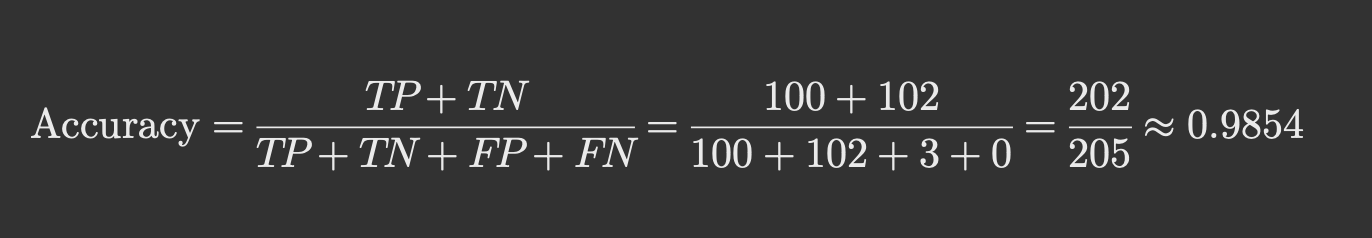

In [13]:
accuracy=accuracy_score(y_test,predictions)
print("Accuracy : ",accuracy)

Accuracy :  0.9853658536585366


**Advantages of Random Forest -**
* 	Does not require normalization or scaling of data.
*	Not sensitive to missing values.
*   Reduces risk of overfitting
*	Requires less pre-processing
*	Efficient with large datasets
*	High accuracy

**Disadvantages of Random Forest -**
*   Time Consuming
*   Requires more resources
*   More complex